# Le réchauffement climatique

On va tenter de répondre dans ce projet à une question : des mesures de température mesurées localement au cours du dernier siècle mettent-elles en évidence un réchauffement significatif ? On va travailler pour répondre à cette question sur les relevés de température enregistrés quotidiennement depuis juin 1920 à [la station météorologique de Montélimar](https://donneespubliques.meteofrance.fr/metadonnees_publiques/fiches/fiche_26198001.pdf). Elles peuvent être téléchargées librement depuis le [site de l'ECAD](https://www.ecad.eu/) (European Climate Assessment & Dataset).

Vous trouverez dans le fichier *montelimar_temperature.dat* un fichier de données préparées avec :
- colonne 1 : date en MJD (*modified Julian Day*)
- colonne 2 : température en degrés Celsius


La première problématique à laquelle vous êtes confrontés est de faire apparaître un effet faible et lent (on voit dans la figure ci-dessus que le réchauffement est de l'ordre de 1 °C sur les 30 dernières dernières années) à l'échelle des données (amplitudes de fluctuations quotidiennes ou saisonnières dix fois supérieures typiquement).

La seconde problématique est de montrer que l'effet observé est significatif, c'est-à-dire que cette augmentation des températures ne correspond pas à une fluctuation statistique. Pour cela on supposera que l'erreur sur les mesures de température est de l'ordre de 5 °C. C'est l'ordre de grandeur des fluctuations quotidiennes qui ne seront pas prises en compte dans un modèle qui décrit des variations saisonnières.

Les variations saisonnières de la température peuvent être modélisée par une sinusoïde de période une année. Il faut utiliser un modèle du type sinusoïdal :

$$ T(t) = A \sin{(\omega t + \phi)} + B $$

où les paramètres $A$ (amplitude), $\phi$ (phase) et $B$ (température moyenne) doivent être ajustés aux données, alors que $\omega = 2\pi/1\text{ an}$. Cependant, un tel modèle ajusté sur l'ensemble des données ne donnera aucune augmentation moyenne de la température. On pourra par exemple essayer d'appliquer un ajustement sinusoïdal pour chaque décennie, et voir si le paramètre $B$ (température moyenne) augmente. On peut aussi affiner ce modèle en se disant que l'accroissement lent de la température est linéaire. On pourra alors utiliser un modèle de type :

$$ T(t) = A \sin{(\omega t + \phi)} + B + C t $$

où $C$ est un nouveau paramètre à ajuster, qui correspond à l'accroissement linéaire lent de la température.

On gardera aussi en tête que l'ajustement par la fonction `curve_fit` permet de calculer assez facilement l'incertitude sur les paramètres de l'ajustement. Cela permettra de statuer sur le caractère significatif du réchauffement. On veillera alors à discuter les erreurs estimées sur les paramètres ajustés.

# Correction

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

premières lignes des données
[[2.2553e+04 2.2600e+01]
 [2.2554e+04 2.2600e+01]
 [2.2555e+04 2.4800e+01]
 [2.2556e+04 1.7500e+01]
 [2.2557e+04 1.6500e+01]]
nombre de lignes : 36295


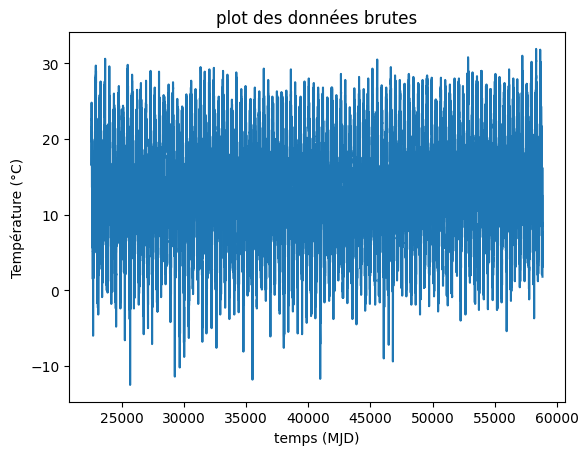

In [2]:
data=np.loadtxt('montelimar_temperature.dat')
npoints=len(data)
print("premières lignes des données")
print(data[:5])
print("nombre de lignes :",npoints)
plt.plot(data[:,0],data[:,1])
plt.title("plot des données brutes")
plt.xlabel("temps (MJD)")
plt.ylabel("Température (°C)")
plt.show()

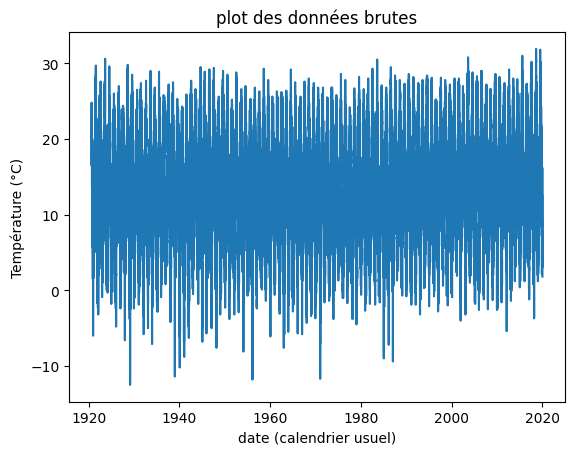

In [3]:
#Convertir les modified julian dates en format plus lisible
#il y a bien sur plusieurs approches

def MJDtoDT64(MJD):
    Jour=((MJD+2400000.5)-2440587.5) #Jour par rapport au zero Unix time
    return Jour.astype('int'), np.datetime64(0,"D")+(Jour.astype('int'))

Jour, Date=MJDtoDT64(data[:,0])
Temperature=data[:,1]
plt.plot(Date,Temperature)
plt.title("plot des données brutes")
plt.xlabel("date (calendrier usuel)")
plt.ylabel("Température (°C)")
plt.show()

Il n'est pas évident à première vue qu'on puisse montrer un réchauffement ici

## Première approche : moyennes locales

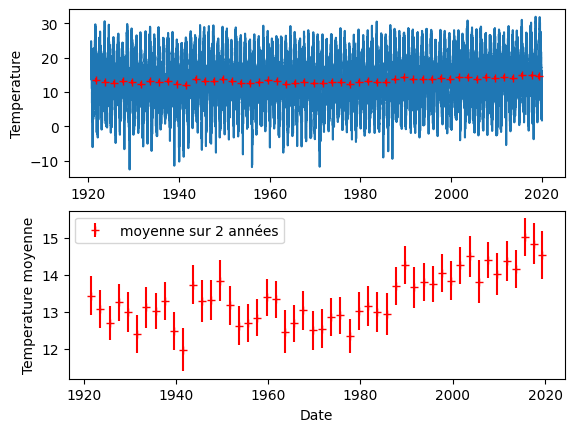

In [4]:
#intervalle de temps sur lequel on moyenne
DT=365*2 # X ans en Jours

#initialisation
time_avg=[]  #moyenne du 'jour'
temp_avg=[]  #moyenne de la température
temp_std=[]  #deviation standard
temp_stem=[] #ecart standard à la moyenne

i=0
while i<npoints:
    #conditions pour trouver les jours compris dans l'intervalle DT
    condi=Jour>=Jour[i]
    condf=Jour<=Jour[i]+DT
    mask=np.logical_and(condi,condf)
    #collecte des données
    days=Jour[mask]
    temps=Temperature[mask]
    #averaging
    time_avg.append(int(np.mean(days)))
    temp_avg.append(np.mean(temps))
    temp_std.append(np.std(temps))
    temp_stem.append(np.std(temps)/np.sqrt(len(days)))
    #prochain indice de départ
    f=np.where(Jour==days[-1])[0][0]
    i=f+1

time_avg=np.array(time_avg,dtype="datetime64[D]")
temp_avg=np.array(temp_avg)
temp_std=np.array(temp_std)
temp_stem=np.array(temp_stem)

plt.subplot(2,1,1)
plt.plot(Date,Temperature)
plt.errorbar(time_avg,temp_avg,temp_stem*2,fmt='r+') #std*2 = 95% confidence interval
plt.ylabel("Temperature")

plt.subplot(2,1,2)
plt.errorbar(time_avg,temp_avg,temp_stem*2,fmt='r+',label="moyenne sur "+str(DT//365)+" années") #std*2 = 95% confidence interval
plt.legend()
plt.xlabel("Date")
plt.ylabel("Temperature moyenne")
plt.show()

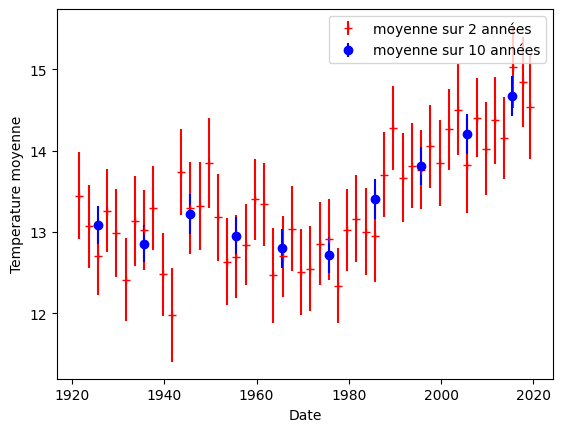

In [5]:
#Comparaison avec un autre intervalle de temps

#intervalle de temps sur lequel on moyenne
DT2=365*10 # X ans en Jours

#initialisation
time_avg2=[]  #moyenne du 'jour'
temp_avg2=[]  #moyenne de la température
temp_std2=[]  #deviation standard
temp_stem2=[] #ecart standard à la moyenne

i=0
while i<npoints:
    #conditions pour trouver les jours compris dans l'intervalle DT
    condi=Jour>=Jour[i]
    condf=Jour<=Jour[i]+DT2
    mask=np.logical_and(condi,condf)
    #collecte des données
    days=Jour[mask]
    temps=Temperature[mask]
    #averaging
    time_avg2.append(int(np.mean(days)))
    temp_avg2.append(np.mean(temps))
    temp_std2.append(np.std(temps))
    temp_stem2.append(np.std(temps)/np.sqrt(len(days)))
    #prochain indice de départ
    f=np.where(Jour==days[-1])[0][0]
    i=f+1

time_avg2=np.array(time_avg2,dtype="datetime64[D]")
temp_avg2=np.array(temp_avg2)
temp_std2=np.array(temp_std2)
temp_stem2=np.array(temp_stem2)

plt.errorbar(time_avg,temp_avg,temp_stem*2,fmt='r+',label="moyenne sur "+str(DT//365)+" années") #std*2 = 95% confidence interval
plt.errorbar(time_avg2,temp_avg2,temp_stem2*2,fmt='bo',label="moyenne sur "+str(DT2//365)+" années") #std*2 = 95% confidence interval
plt.legend()
plt.xlabel("Date")
plt.ylabel("Temperature moyenne")
plt.show()

On voit que les "erreurs" sont assez grande pour des intervalles de moyennes petites. L'erreur se réduit si on allonge l'intervalle, mais on a moins de points


## Deuxième approche : fit des variations saisonnières

premièrement nous allons commencer par vérifier que la fonction choisie peut s'adapter aux données

Parameters +/- 95% CI
amplitude=	 8.437892186167048 	+/- 0.21908715424050798
Period   =	 366.9396349779511 	+/- 1.0623077893832482
Phi0     =	 -3.1905333980201154 	+/- 0.8234506287682182
Offset   =	 12.981375361287789 	+/- 0.15616533129554902


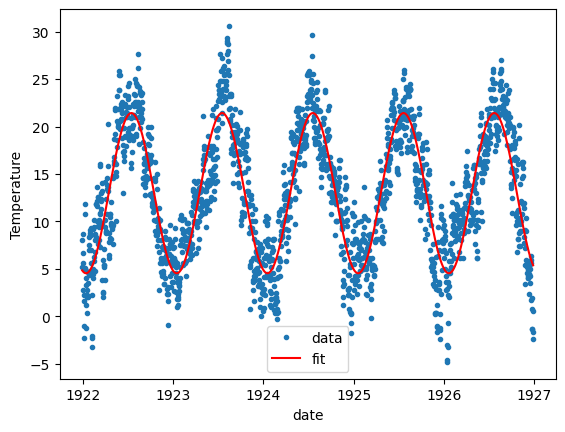

Parameters +/- 95% CI
amplitude=	 9.640321825795173 	+/- 0.2045103955565488
Period   =	 364.1025222646999 	+/- 0.8667828299904515
Phi0     =	 4.936368605318744 	+/- 0.37508365387272125
Offset   =	 13.348229403583089 	+/- 0.14634670511878958


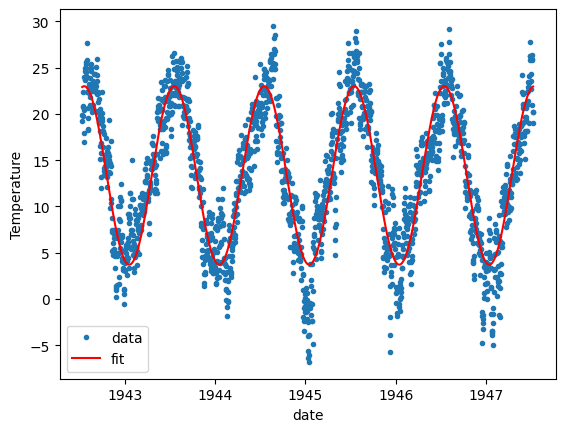

In [6]:
#fonction variation saisonnière
def season(t,Ampl,Tperiod,Phi0,Offset):
    """
    Fonction de variation saisonnière
    """
    return Offset+Ampl*np.sin(2*np.pi*t/Tperiod+Phi0)

#test de la fonction de fit sur un intervalle prix un peu au hasard
istart=500
iend=istart+365*5  # 5 ans
days=Jour[istart:iend]
dates=Date[istart:iend]
temps=Temperature[istart:iend]

pars, covars=curve_fit(season,days,temps,p0=[10,365,0,12],sigma=5*np.ones(len(temps)))

Ampl,Tperiod,Phi0,Offset=pars
eAmpl,eTperiod,ePhi0,eOffset=np.sqrt(np.diag(covars))*2
print("Parameters +/- 95% CI")
print("amplitude=\t",Ampl,"\t+/-",eAmpl)
print("Period   =\t",Tperiod,"\t+/-",eTperiod)
print("Phi0     =\t",Phi0,"\t+/-",ePhi0)
print("Offset   =\t",Offset,"\t+/-",eOffset)

plt.plot(dates,temps,'.',label='data')
plt.plot(dates,season(days,*pars),'r-',label='fit')
plt.xlabel("date")
plt.ylabel("Temperature")
plt.legend()
plt.show()

#test de la fonction de fit sur un intervalle prix un peu au hasard
istart=8000
iend=istart+365*5  # 5 ans
days=Jour[istart:iend]
dates=Date[istart:iend]
temps=Temperature[istart:iend]

pars, covars=curve_fit(season,days,temps,p0=[10,365,0,12],sigma=5*np.ones(len(temps)))

Ampl,Tperiod,Phi0,Offset=pars
eAmpl,eTperiod,ePhi0,eOffset=np.sqrt(np.diag(covars))*2
print("Parameters +/- 95% CI")
print("amplitude=\t",Ampl,"\t+/-",eAmpl)
print("Period   =\t",Tperiod,"\t+/-",eTperiod)
print("Phi0     =\t",Phi0,"\t+/-",ePhi0)
print("Offset   =\t",Offset,"\t+/-",eOffset)

plt.plot(dates,temps,'.',label='data')
plt.plot(dates,season(days,*pars),'r-',label='fit')
plt.xlabel("date")
plt.ylabel("Temperature")
plt.legend()
plt.show()

Ensuite on peut fitter les données sur des périodes plus ou moins longues (ici 2 ans). Le paramètre important est en fait l'Offset qui représente la température moyenne autout de laquelle fluctue la température avec des variations saisonnières.

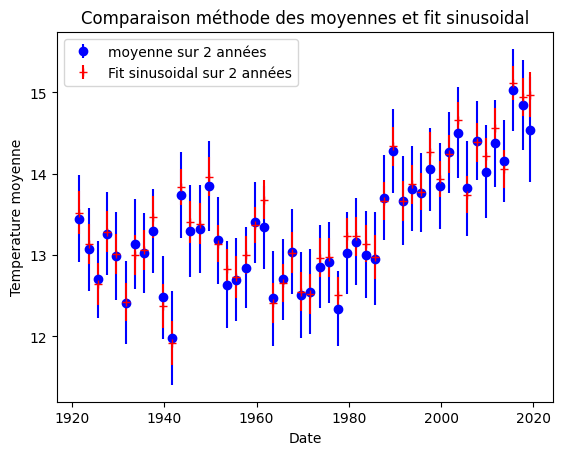

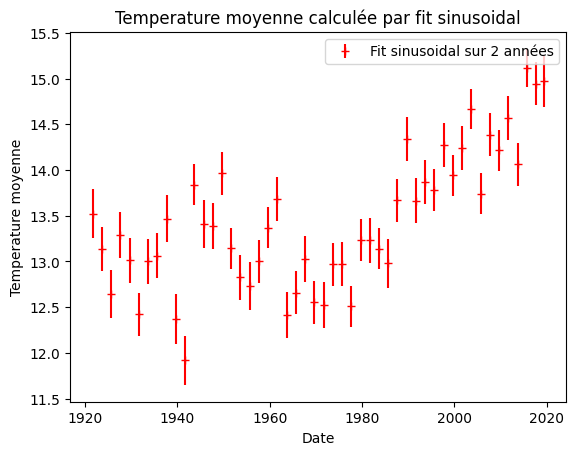

In [7]:
#intervalle de temps sur lequel on moyenne
DTf=365*2 # X ans en Jours

#initialisation
time_avgf=[]  #moyenne du 'jour'
temp_avgf=[]  #moyenne de la température
temp_stemf=[] #ecart standard à la moyenne

i=0
while i<npoints:
    #conditions pour trouver les jours compris dans l'intervalle DT
    condi=Jour>=Jour[i]
    condf=Jour<=Jour[i]+DTf
    mask=np.logical_and(condi,condf)
    #collecte des données
    days=Jour[mask]
    temps=Temperature[mask]
    #fitting and averaging
    time_avgf.append(int(np.mean(days)))    
    pars, covars=curve_fit(season,days,temps,p0=[10,365,0,12],sigma=5*np.ones(len(temps)))    
    temp_avgf.append(pars[3])
    temp_stemf.append(np.sqrt(np.diag(covars))[3])
    #prochain indice de départ
    f=np.where(Jour==days[-1])[0][0]
    i=f+1

time_avgf=np.array(time_avgf,dtype="datetime64[D]")
temp_avgf=np.array(temp_avgf)
temp_stemf=np.array(temp_stemf)

plt.errorbar(time_avg,temp_avg,temp_stem*2,fmt='bo',label="moyenne sur "+str(DT//365)+" années") #std*2 = 95% confidence interval
plt.errorbar(time_avgf,temp_avgf,temp_stemf*2,fmt='r+',label="Fit sinusoidal sur "+str(DT//365)+" années") #std*2 = 95% confidence interval
plt.legend()
plt.xlabel("Date")
plt.ylabel("Temperature moyenne")
plt.title("Comparaison méthode des moyennes et fit sinusoidal")
plt.show()

plt.errorbar(time_avgf,temp_avgf,temp_stemf*2,fmt='r+',label="Fit sinusoidal sur "+str(DT//365)+" années") #std*2 = 95% confidence interval
plt.legend()
plt.xlabel("Date")
plt.ylabel("Temperature moyenne")
plt.title("Temperature moyenne calculée par fit sinusoidal")
plt.show()

La méthode par fit saisonnier donne un meilleur intervalle de confiance pour les températures moyennes que l'approche par moyenne locale.

## Troisième approche : fit sinusoidal + accroissemnt linéaire

Dans cette troisième approche on fit tout le range avec une fonction sinusoïdale superposée à une fonction affine

Parameters +/- 95% CI
amplitude=	 8.439653584381487 	+/- 0.21947549271926053
Period   =	 366.9398252036625 	+/- 1.062342864621892
Phi0     =	 3.091945658740273 	+/- 0.8234890891347286
Offset   =	 12.262562900748584 	+/- 4.93797056642809
Slope    =	 -4.324439553470166e-05 	+/- 0.00029692388760775654


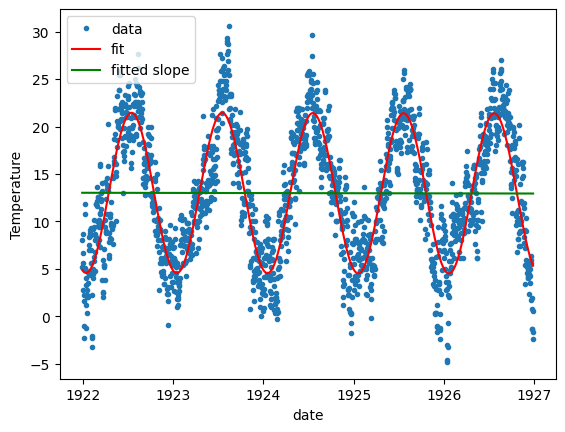

Parameters +/- 95% CI
amplitude=	 -8.878141288595284 	+/- 0.20404309017576494
Period   =	 363.30496995660513 	+/- 0.8959953571892025
Phi0     =	 0.27571319016064555 	+/- 0.46440595048389127
Offset   =	 10.191532149096055 	+/- 2.976138857809
Slope    =	 0.00035971369139674173 	+/- 0.0002732487829754618


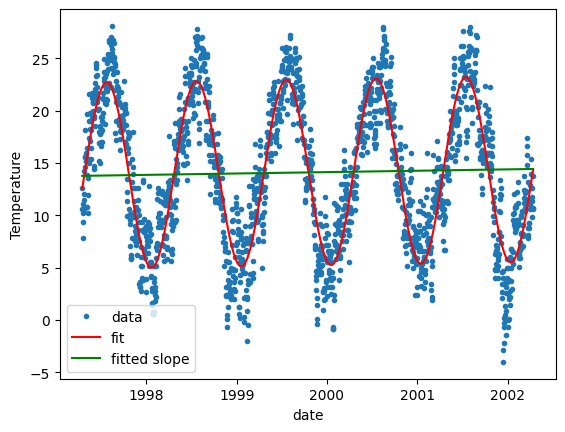

In [8]:
#code de la fonction de fit

def climat(t,Ampl,Tperiod,Phi0,Offset,Slope):
    """
    Fonction de variation de la température avec saison + affine
    """
    return Offset+Slope*t+Ampl*np.sin(2*np.pi*t/Tperiod+Phi0)

def climatslope(t,Ampl,Tperiod,Phi0,Offset,Slope):
    """
    Fonction pour ne plotter que la partie affine
    """
    return Offset+Slope*t

#Comme pour la deuxième méthode on commence par tester la qualité du fit sur un intervalle restreint
istart=500
iend=istart+365*5  # 5 ans
days=Jour[istart:iend]
dates=Date[istart:iend]
temps=Temperature[istart:iend]

pars, covars=curve_fit(climat,days,temps,p0=[10,365,0,12,0.1],sigma=5*np.ones(len(temps)))

Ampl,Tperiod,Phi0,Offset,Slope=pars
eAmpl,eTperiod,ePhi0,eOffset,eSlope=np.sqrt(np.diag(covars))*2 #95% CI
print("Parameters +/- 95% CI")
print("amplitude=\t",Ampl,"\t+/-",eAmpl)
print("Period   =\t",Tperiod,"\t+/-",eTperiod)
print("Phi0     =\t",Phi0,"\t+/-",ePhi0)
print("Offset   =\t",Offset,"\t+/-",eOffset)
print("Slope    =\t",Slope,"\t+/-",eSlope)

plt.plot(dates,temps,'.',label='data')
plt.plot(dates,climat(days,*pars),'r-',label='fit')
plt.plot(dates,climatslope(days,*pars),'g-',label='fitted slope')
plt.xlabel("date")
plt.ylabel("Temperature")
plt.legend()
plt.show()

istart=28000
iend=istart+365*5  # 5 ans
days=Jour[istart:iend]
dates=Date[istart:iend]
temps=Temperature[istart:iend]

pars, covars=curve_fit(climat,days,temps,p0=[10,365,0,12,0.1],sigma=5*np.ones(len(temps)))

Ampl,Tperiod,Phi0,Offset,Slope=pars
eAmpl,eTperiod,ePhi0,eOffset,eSlope=np.sqrt(np.diag(covars))*2 #95% CI
print("Parameters +/- 95% CI")
print("amplitude=\t",Ampl,"\t+/-",eAmpl)
print("Period   =\t",Tperiod,"\t+/-",eTperiod)
print("Phi0     =\t",Phi0,"\t+/-",ePhi0)
print("Offset   =\t",Offset,"\t+/-",eOffset)
print("Slope    =\t",Slope,"\t+/-",eSlope)

plt.plot(dates,temps,'.',label='data')
plt.plot(dates,climat(days,*pars),'r-',label='fit')
plt.plot(dates,climatslope(days,*pars),'g-',label='fitted slope')
plt.xlabel("date")
plt.ylabel("Temperature")
plt.legend()
plt.show()


On peut maintenant fitter sur toute la durée des data

Parameters +/- 95% CI
amplitude=	 9.009236541229104 	+/- 0.04722491552689161
Period   =	 365.252148607072 	+/- 0.010598722324593498
Phi0     =	 -1.8938613530242712 	+/- 0.005236044668983439
Offset   =	 13.363125564480585 	+/- 0.03337566362867546
Slope    =	 4.6162376053752255e-05 	+/- 3.1853994437938357e-06


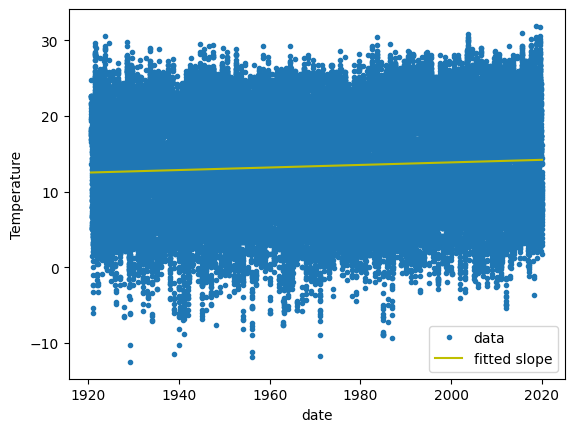

In [9]:
days=Jour[:]
dates=Date[:]
temps=Temperature[:]

pars, covars=curve_fit(climat,days,temps,p0=[10,365,0,12,0.1],sigma=5*np.ones(len(temps)))

Ampl,Tperiod,Phi0,Offset,Slope=pars
eAmpl,eTperiod,ePhi0,eOffset,eSlope=np.sqrt(np.diag(covars))*2 #95% CI
print("Parameters +/- 95% CI")
print("amplitude=\t",Ampl,"\t+/-",eAmpl)
print("Period   =\t",Tperiod,"\t+/-",eTperiod)
print("Phi0     =\t",Phi0,"\t+/-",ePhi0)
print("Offset   =\t",Offset,"\t+/-",eOffset)
print("Slope    =\t",Slope,"\t+/-",eSlope)

plt.plot(dates,temps,'.',label='data')
#plt.plot(dates,climat(days,*pars),'r-',label='fit')
plt.plot(dates,climatslope(days,*pars),'y-',label='fitted slope')
plt.xlabel("date")
plt.ylabel("Temperature")
plt.legend()
plt.show()

On remarque plusieurs choses :
- la durée d'une année est bien de 365.25 jours !
- la valeur de l'offset dépend du "0" considéré. Ici nous avons fitté en jours à partir du zéro Unix, soit le 1er janvier 1970. 
- la pente est significativement positive... convertissons la en unité plus lisible

In [10]:
print("Pente moyenne de l'augmentation de la température sur la période",Date[0],"à",Date[-1])
print("Slope =\t",np.round(Slope,8),"\t+/-",np.round(eSlope,8), "\t degrés par jours")
print("Slope =\t",np.round(Slope*365.25,5),"\t+/-",np.round(eSlope*365.25,5),"\t degrés par ans")
print("Slope =\t",np.round(Slope*365.25*10,5),"\t+/-",np.round(eSlope*365.25*10,5),"\t degrés par décennies")

Pente moyenne de l'augmentation de la température sur la période 1920-08-17 à 2019-12-31
Slope =	 4.616e-05 	+/- 3.19e-06 	 degrés par jours
Slope =	 0.01686 	+/- 0.00116 	 degrés par ans
Slope =	 0.16861 	+/- 0.01163 	 degrés par décennies


On pourrait aussi fitter avec le modèle sinusoidal + affine sur des plages restreintes du jeu de données (e.g. après 1960...)